In [380]:
import os
os.getcwd()

'e:\\Data_Analysis\\Data_Analytics_Projects\\GDP and Economic Comparison Sri Lanka vs. USA\\GDP-and-Economic-Comparison-Sri-Lanka-vs.-USA\\Notebook'

In [2]:
#importing all the requirement libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)


In [3]:
#import datasets
df1=pd.read_csv('../Datasets/Sri Lanka Economy.csv')
df2=pd.read_csv('../Datasets/USA GDP Growth 1961-2021.csv')

In [383]:
df1.head()

,Year,Population,Population growth rate,GDP,GDP growth percentage,Annual change in GDP growth,GDP Per Capita,Annual Growth Rate in GDP Per Capita,GNI,GNI Growth Rate,GNI Per Capita,GNI Per Capita Annual Growth Rate,Government Debt as % of GDP,Annual Change in Debt to GDP Ratio,GNP,Inflation Rate,Annual Change in Inflation Rate
0,2021,"2,17,73,441",0.27%,$84.52B,3.66%,7.27%,"$3,815",3.27%,$84.57B,4.12%,"$3,820",2.69%,Null,Null,$84.57B,7.01%,0.86%
1,2020,"2,17,15,079",0.30%,$80.97B,-3.62%,-5.94%,"$3,694",-4.01%,$81.45B,-3.45%,"$3,720",-7.23%,Null,Null,$81.45B,6.15%,2.63%
2,2019,"2,16,49,664",0.32%,$83.90B,2.33%,-0.94%,"$3,848",-5.20%,$87.46B,2.14%,"$4,010",-0.74%,Null,Null,$87.46B,3.53%,1.39%
3,2018,"2,15,80,710",0.34%,$87.96B,3.27%,-0.31%,"$4,059",-0.44%,$87.46B,3.19%,"$4,040",4.39%,Null,Null,$87.46B,2.14%,-5.57%
4,2017,"2,15,06,813",0.38%,$87.43B,3.58%,-0.91%,"$4,077",4.91%,$83.01B,3.59%,"$3,870",1.57%,Null,Null,$83.01B,7.70%,3.75%


In [384]:
df2.head()

,Year,GDP,GDP per Capita,Growth
0,2021.0,"$22,996.10B","$69,288",5.67%
1,2020.0,"$20,893.74B","$63,028",-3.40%
2,2019.0,"$21,372.57B","$65,095",2.29%
3,2018.0,"$20,527.16B","$62,805",2.92%
4,2017.0,"$19,479.62B","$59,915",2.26%


In [385]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Year                                  62 non-null     int64 
 1   Population                            62 non-null     object
 2   Population growth rate                62 non-null     object
 3   GDP                                   62 non-null     object
 4   GDP growth percentage                 62 non-null     object
 5   Annual change in GDP growth           62 non-null     object
 6   GDP Per Capita                        62 non-null     object
 7   Annual Growth Rate in GDP Per Capita  62 non-null     object
 8   GNI                                   62 non-null     object
 9   GNI Growth Rate                       62 non-null     object
 10  GNI Per Capita                        62 non-null     object
 11  GNI Per Capita Annual Growth Rate 

In [10]:
#so we need to convert to appropriate data types oth of datasets
#lets take first dataset which represent informations about Sri Lanka 
#df1.head()
#df1['Population'].fillna(0, inplace=True)
df1['GDP'] = df1['GDP'].str.replace('B', '') 
df1['GDP'] = df1['GDP'].str.replace('$', '') 

In [ ]:
df1.head()
#df2.info()

,Year,Population,Population growth rate,GDP,GDP growth percentage,Annual change in GDP growth,GDP Per Capita,Annual Growth Rate in GDP Per Capita,GNI,GNI Growth Rate,GNI Per Capita,GNI Per Capita Annual Growth Rate,Government Debt as % of GDP,Annual Change in Debt to GDP Ratio,GNP,Inflation Rate,Annual Change in Inflation Rate,GDP_in_Billion
0,2021,"2,17,73,441",0.27%,$84.52B,3.66%,7.27%,"$3,815",3.27%,$84.57B,4.12%,"$3,820",2.69%,Null,Null,$84.57B,7.01%,0.86%,$84.52
1,2020,"2,17,15,079",0.30%,$80.97B,-3.62%,-5.94%,"$3,694",-4.01%,$81.45B,-3.45%,"$3,720",-7.23%,Null,Null,$81.45B,6.15%,2.63%,$80.97
2,2019,"2,16,49,664",0.32%,$83.90B,2.33%,-0.94%,"$3,848",-5.20%,$87.46B,2.14%,"$4,010",-0.74%,Null,Null,$87.46B,3.53%,1.39%,$83.90
3,2018,"2,15,80,710",0.34%,$87.96B,3.27%,-0.31%,"$4,059",-0.44%,$87.46B,3.19%,"$4,040",4.39%,Null,Null,$87.46B,2.14%,-5.57%,$87.96
4,2017,"2,15,06,813",0.38%,$87.43B,3.58%,-0.91%,"$4,077",4.91%,$83.01B,3.59%,"$3,870",1.57%,Null,Null,$83.01B,7.70%,3.75%,$87.43


In [11]:
df1['GDP'] = df1['GDP'].astype(float) #convert cleaned string into int 
df1.head()

,Year,Population,Population growth rate,GDP,GDP growth percentage,Annual change in GDP growth,GDP Per Capita,Annual Growth Rate in GDP Per Capita,GNI,GNI Growth Rate,GNI Per Capita,GNI Per Capita Annual Growth Rate,Government Debt as % of GDP,Annual Change in Debt to GDP Ratio,GNP,Inflation Rate,Annual Change in Inflation Rate
6,2015,"2,13,36,697",0.46%,80.60,5.01%,0.05%,"$3,844",0.64%,$78.75B,4.70%,"$3,760",3.30%,77.65%,6.32%,$78.75B,3.77%,0.59%
7,2014,"2,12,39,457",0.51%,79.36,4.96%,1.57%,"$3,819",5.79%,$75.60B,5.00%,"$3,640",4.30%,71.33%,0.51%,$75.60B,3.18%,-3.73%
8,2013,"2,11,31,756",0.55%,74.32,3.40%,-5.75%,"$3,610",7.75%,$71.92B,2.76%,"$3,490",3.87%,70.82%,2.11%,$71.92B,6.91%,-0.63%
9,2012,"2,10,17,147",0.75%,68.43,9.14%,0.74%,"$3,351",4.68%,$68.56B,8.30%,"$3,360",17.89%,68.71%,-2.40%,$68.56B,7.54%,0.83%
10,2011,"2,08,59,743",0.93%,65.29,8.40%,0.39%,"$3,201",14.33%,$58.05B,8.53%,"$2,850",18.26%,71.11%,-0.48%,$58.05B,6.72%,0.50%


In [394]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  62 non-null     int64  
 1   Population                            62 non-null     object 
 2   Population growth rate                62 non-null     object 
 3   GDP                                   62 non-null     float64
 4   GDP growth percentage                 62 non-null     object 
 5   Annual change in GDP growth           62 non-null     object 
 6   GDP Per Capita                        62 non-null     object 
 7   Annual Growth Rate in GDP Per Capita  62 non-null     object 
 8   GNI                                   62 non-null     object 
 9   GNI Growth Rate                       62 non-null     object 
 10  GNI Per Capita                        62 non-null     object 
 11  GNI Per Capita Annual

In [12]:

new_names = {'GDP': 'GDP_in_B',
             'GNI':'GNI_in_B',
             'GNP':'GNP_in_B'
             # Add more mappings as needed
            }

# Rename the columns using the rename() method
df1.rename(columns=new_names, inplace=True)

In [ ]:
#cheking for null values on Sri Lanka dataset
df1.isnull().sum()


Year                                    0
Population                              0
Population growth rate                  0
GDP                                     0
GDP growth percentage                   0
Annual change in GDP growth             0
GDP Per Capita                          0
Annual Growth Rate in GDP Per Capita    0
GNI                                     0
GNI Growth Rate                         0
GNI Per Capita                          0
GNI Per Capita Annual Growth Rate       0
Government Debt as % of GDP             0
Annual Change in Debt to GDP Ratio      0
GNP                                     0
Inflation Rate                          0
Annual Change in Inflation Rate         0
dtype: int64

In [ ]:
#cheking for null values on USA  dataset 
df2.isnull().sum()

Year              1
GDP               1
GDP per Capita    1
Growth            1
dtype: int64

In [23]:
#Drops which having null values 
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [ ]:
#find duplicate rows count on USA dataset 
df1.duplicated().value_counts()

False    62
Name: count, dtype: int64

In [ ]:
#check dulications on Sri Lanka dataset 
df2.duplicated().value_counts()

False    61
Name: count, dtype: int64

In [24]:
#convert year to int type on Sri Lanka dataset 
df2['Year'] = df2['Year'].astype(int)

In [13]:

#lets clean strings removing unwanted values
df1['GNI_in_B'] = df1['GNI_in_B'].str.replace('B', '') 
df1['GNI_in_B'] = df1['GNI_in_B'].str.replace('$', '') 

df1['GNP_in_B'] = df1['GNP_in_B'].str.replace('B', '') 
df1['GNP_in_B'] = df1['GNP_in_B'].str.replace('$', '') 
df1.head()


,Year,Population,Population growth rate,GDP_in_B,GDP growth percentage,Annual change in GDP growth,GDP Per Capita,Annual Growth Rate in GDP Per Capita,GNI_in_B,GNI Growth Rate,GNI Per Capita,GNI Per Capita Annual Growth Rate,Government Debt as % of GDP,Annual Change in Debt to GDP Ratio,GNP_in_B,Inflation Rate,Annual Change in Inflation Rate
6,2015,"2,13,36,697",0.46%,80.60,5.01%,0.05%,"$3,844",0.64%,78.75,4.70%,"$3,760",3.30%,77.65%,6.32%,78.75,3.77%,0.59%
7,2014,"2,12,39,457",0.51%,79.36,4.96%,1.57%,"$3,819",5.79%,75.60,5.00%,"$3,640",4.30%,71.33%,0.51%,75.60,3.18%,-3.73%
8,2013,"2,11,31,756",0.55%,74.32,3.40%,-5.75%,"$3,610",7.75%,71.92,2.76%,"$3,490",3.87%,70.82%,2.11%,71.92,6.91%,-0.63%
9,2012,"2,10,17,147",0.75%,68.43,9.14%,0.74%,"$3,351",4.68%,68.56,8.30%,"$3,360",17.89%,68.71%,-2.40%,68.56,7.54%,0.83%
10,2011,"2,08,59,743",0.93%,65.29,8.40%,0.39%,"$3,201",14.33%,58.05,8.53%,"$2,850",18.26%,71.11%,-0.48%,58.05,6.72%,0.50%


In [14]:
df1['GDP Per Capita'] = df1['GDP Per Capita'].str.replace('$', '') 
df1['Annual Growth Rate in GDP Per Capita'] = df1['Annual Growth Rate in GDP Per Capita'].str.replace('%', '') 
df1['GNI Growth Rate'] = df1['GNI Growth Rate'].str.replace('%', '') 
df1['GNI Per Capita'] = df1['GNI Per Capita'].str.replace('$', '') 
df1['GNI Per Capita Annual Growth Rate'] = df1['GNI Per Capita Annual Growth Rate'].str.replace('%', '') 
df1['Inflation Rate'] = df1['Inflation Rate'].str.replace('%', '') 
df1['Annual Change in Inflation Rate'] = df1['Annual Change in Inflation Rate'].str.replace('%', '') 
df1.head()

,Year,Population,Population growth rate,GDP_in_B,GDP growth percentage,Annual change in GDP growth,GDP Per Capita,Annual Growth Rate in GDP Per Capita,GNI_in_B,GNI Growth Rate,GNI Per Capita,GNI Per Capita Annual Growth Rate,Government Debt as % of GDP,Annual Change in Debt to GDP Ratio,GNP_in_B,Inflation Rate,Annual Change in Inflation Rate
6,2015,"2,13,36,697",0.46%,80.60,5.01%,0.05%,"3,844",0.64,78.75,4.70,"3,760",3.30,77.65%,6.32%,78.75,3.77,0.59
7,2014,"2,12,39,457",0.51%,79.36,4.96%,1.57%,"3,819",5.79,75.60,5.00,"3,640",4.30,71.33%,0.51%,75.60,3.18,-3.73
8,2013,"2,11,31,756",0.55%,74.32,3.40%,-5.75%,"3,610",7.75,71.92,2.76,"3,490",3.87,70.82%,2.11%,71.92,6.91,-0.63
9,2012,"2,10,17,147",0.75%,68.43,9.14%,0.74%,"3,351",4.68,68.56,8.30,"3,360",17.89,68.71%,-2.40%,68.56,7.54,0.83
10,2011,"2,08,59,743",0.93%,65.29,8.40%,0.39%,"3,201",14.33,58.05,8.53,"2,850",18.26,71.11%,-0.48%,58.05,6.72,0.50


In [15]:

df1['Population'] = df1['Population'].str.replace(',', '') 
df1.rename(columns={'Population': 'Population_in_M'}, inplace=True)

In [406]:
df1.head()

,Year,Population_in_M,Population growth rate,GDP_in_B,GDP growth percentage,Annual change in GDP growth,GDP Per Capita,Annual Growth Rate in GDP Per Capita,GNI_in_B,GNI Growth Rate,GNI Per Capita,GNI Per Capita Annual Growth Rate,Government Debt as % of GDP,Annual Change in Debt to GDP Ratio,GNP_in_B,Inflation Rate,Annual Change in Inflation Rate
0,2021,21773441,0.27%,84.52,3.66%,7.27%,"3,815",3.27,84.57,4.12,"3,820",2.69,Null,Null,84.57,7.01,0.86
1,2020,21715079,0.30%,80.97,-3.62%,-5.94%,"3,694",-4.01,81.45,-3.45,"3,720",-7.23,Null,Null,81.45,6.15,2.63
2,2019,21649664,0.32%,83.90,2.33%,-0.94%,"3,848",-5.20,87.46,2.14,"4,010",-0.74,Null,Null,87.46,3.53,1.39
3,2018,21580710,0.34%,87.96,3.27%,-0.31%,"4,059",-0.44,87.46,3.19,"4,040",4.39,Null,Null,87.46,2.14,-5.57
4,2017,21506813,0.38%,87.43,3.58%,-0.91%,"4,077",4.91,83.01,3.59,"3,870",1.57,Null,Null,83.01,7.70,3.75


In [416]:
df1_cleaned = df1.dropna()

In [4]:
df1.replace('Null', np.nan, inplace=True)

In [6]:
#removed null values 
df1.dropna(inplace=True)
print(df1)

    Year   Population Population growth rate      GDP GDP growth percentage  \
6   2015  2,13,36,697                  0.46%  $80.60B                 5.01%   
7   2014  2,12,39,457                  0.51%  $79.36B                 4.96%   
8   2013  2,11,31,756                  0.55%  $74.32B                 3.40%   
9   2012  2,10,17,147                  0.75%  $68.43B                 9.14%   
10  2011  2,08,59,743                  0.93%  $65.29B                 8.40%   
11  2010  2,06,68,557                  0.91%  $56.73B                 8.02%   
12  2009  2,04,82,477                  0.97%  $42.07B                 3.54%   
14  2007  2,00,78,655                  1.05%  $32.35B                 6.80%   
15  2006  1,98,70,706                  1.00%  $28.28B                 7.67%   
16  2005  1,96,73,866                  0.94%  $24.41B                 6.24%   
17  2004  1,94,90,431                  0.97%  $20.66B                 5.45%   
18  2003  1,93,03,180                  1.01%  $18.88

In [16]:
#Change data types 
#df1['Population_in_M'] = df1['Population_in_M'].astype(int)
df1['Annual Growth Rate in GDP Per Capita'] = df1['Annual Growth Rate in GDP Per Capita'].astype(float)
df1['GNI_in_B'] = df1['GNI_in_B'].astype(float)
df1['GNI Growth Rate'] = df1['GNI Growth Rate'].astype(float)
df1['GNI Per Capita Annual Growth Rate'] = df1['GNI Per Capita Annual Growth Rate'].astype(float)
df1['GNP_in_B'] = df1['GNP_in_B'].astype(float)
df1['Inflation Rate'] = df1['Inflation Rate'].astype(float)
df1['Annual Change in Inflation Rate'] = df1['Annual Change in Inflation Rate'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 6 to 31
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  25 non-null     int64  
 1   Population_in_M                       25 non-null     object 
 2   Population growth rate                25 non-null     object 
 3   GDP_in_B                              25 non-null     float64
 4   GDP growth percentage                 25 non-null     object 
 5   Annual change in GDP growth           25 non-null     object 
 6   GDP Per Capita                        25 non-null     object 
 7   Annual Growth Rate in GDP Per Capita  25 non-null     float64
 8   GNI_in_B                              25 non-null     float64
 9   GNI Growth Rate                       25 non-null     float64
 10  GNI Per Capita                        25 non-null     object 
 11  GNI Per Capita Annual Grow

In [18]:
#dremove unwanted strings and clean
df1['Population growth rate'] = df1['Population growth rate'].str.replace('%', '') 
df1['GDP growth percentage'] = df1['GDP growth percentage'].str.replace('%', '') 
df1['Annual change in GDP growth'] = df1['Annual change in GDP growth'].str.replace('%', '') 
df1['GDP Per Capita'] = df1['GDP Per Capita'].str.replace(',', '') 
df1['GNI Per Capita'] = df1['GNI Per Capita'].str.replace(',', '') 
df1['Government Debt as % of GDP'] = df1['Government Debt as % of GDP'].str.replace('%', '') 
df1['Annual Change in Debt to GDP Ratio'] = df1['Annual Change in Debt to GDP Ratio'].str.replace('%', '') 
df1.head()

,Year,Population_in_M,Population growth rate,GDP_in_B,GDP growth percentage,Annual change in GDP growth,GDP Per Capita,Annual Growth Rate in GDP Per Capita,GNI_in_B,GNI Growth Rate,GNI Per Capita,GNI Per Capita Annual Growth Rate,Government Debt as % of GDP,Annual Change in Debt to GDP Ratio,GNP_in_B,Inflation Rate,Annual Change in Inflation Rate
6,2015,21336697,0.46,80.60,5.01,0.05,3844,0.64,78.75,4.70,3760,3.30,77.65,6.32,78.75,3.77,0.59
7,2014,21239457,0.51,79.36,4.96,1.57,3819,5.79,75.60,5.00,3640,4.30,71.33,0.51,75.60,3.18,-3.73
8,2013,21131756,0.55,74.32,3.40,-5.75,3610,7.75,71.92,2.76,3490,3.87,70.82,2.11,71.92,6.91,-0.63
9,2012,21017147,0.75,68.43,9.14,0.74,3351,4.68,68.56,8.30,3360,17.89,68.71,-2.40,68.56,7.54,0.83
10,2011,20859743,0.93,65.29,8.40,0.39,3201,14.33,58.05,8.53,2850,18.26,71.11,-0.48,58.05,6.72,0.50


In [20]:
#clean strings change to appropriate types
df1['Population_in_M'] = df1['Population_in_M'].astype(int)
df1['Population growth rate'] = df1['Population growth rate'].astype(float)
df1['GDP growth percentage'] = df1['GDP growth percentage'].astype(float)
df1['Annual change in GDP growth'] = df1['Annual change in GDP growth'].astype(float)
df1['GDP Per Capita'] = df1['GDP Per Capita'].astype(int)
df1['GNI Per Capita'] = df1['GNI Per Capita'].astype(int)
df1['Government Debt as % of GDP'] = df1['Government Debt as % of GDP'].astype(float)
df1['Annual Change in Debt to GDP Ratio'] = df1['Annual Change in Debt to GDP Ratio'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 6 to 31
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  25 non-null     int64  
 1   Population_in_M                       25 non-null     int32  
 2   Population growth rate                25 non-null     float64
 3   GDP_in_B                              25 non-null     float64
 4   GDP growth percentage                 25 non-null     float64
 5   Annual change in GDP growth           25 non-null     float64
 6   GDP Per Capita                        25 non-null     int32  
 7   Annual Growth Rate in GDP Per Capita  25 non-null     float64
 8   GNI_in_B                              25 non-null     float64
 9   GNI Growth Rate                       25 non-null     float64
 10  GNI Per Capita                        25 non-null     int32  
 11  GNI Per Capita Annual Grow

In [28]:
#clean stings removing unwanted parts from second data set (usa econommics)
df2.rename(columns={'GDP': 'GDP_in_B'}, inplace=True)
df2['GDP_in_B'] = df2['GDP_in_B'].str.replace('B', '') 
df2['GDP_in_B'] = df2['GDP_in_B'].str.replace('$', '') 
df2['GDP_in_B'] = df2['GDP_in_B'].str.replace(',', '') 
df2['GDP_in_B'] = df2['GDP_in_B'].str.replace('$', '') 
df2['GDP per Capita'] = df2['GDP per Capita'].str.replace('$', '') 
df2['GDP per Capita'] = df2['GDP per Capita'].str.replace(',', '') 
df2['Growth'] = df2['Growth'].str.replace('%', '') 
df2.head()

,Year,GDP_in_B,GDP per Capita,Growth
0,2021,22996.10,69288,5.67
1,2020,20893.74,63028,-3.40
2,2019,21372.57,65095,2.29
3,2018,20527.16,62805,2.92
4,2017,19479.62,59915,2.26


In [31]:
#convert second dataset to appropriate types 
df2['GDP_in_B'] = df2['GDP_in_B'].astype(float)
df2['GDP per Capita'] = df2['GDP per Capita'].astype(int)
df2['Growth'] = df2['Growth'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            61 non-null     int32  
 1   GDP_in_B        61 non-null     float64
 2   GDP per Capita  61 non-null     int32  
 3   Growth          61 non-null     float64
dtypes: float64(2), int32(2)
memory usage: 1.9 KB


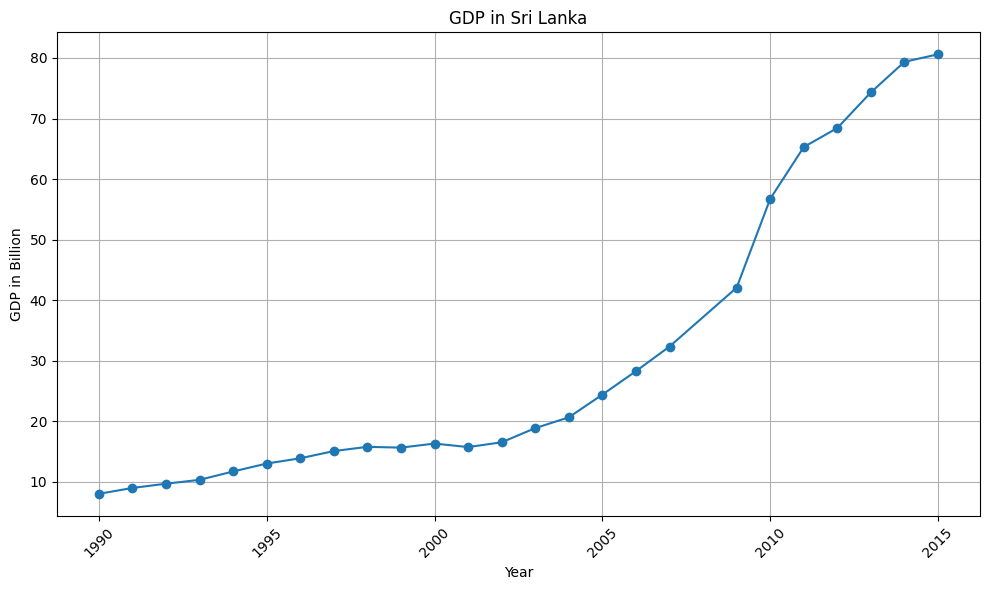

In [58]:





df1.sort_values(by='Year', inplace=True)

# Plot GDP over time
plt.figure(figsize=(10, 6))
plt.plot(df1['Year'], df1['GDP_in_B'], marker='o', linestyle='-')
#plt.plot(df2['Year'], df2['GDP_in_B'], marker='o', linestyle='-')
plt.title('GDP in Sri Lanka')
plt.xlabel('Year')
plt.ylabel('GDP in Billion')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


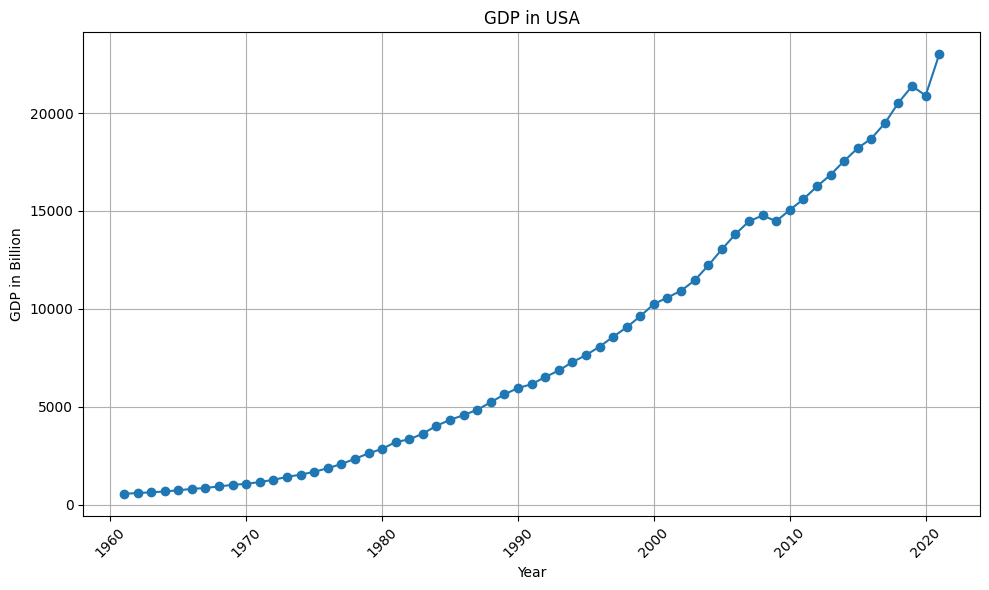

In [56]:
df2.sort_values(by='Year', inplace=True)

# Plot GDP over time
plt.figure(figsize=(10, 6))
plt.plot(df2['Year'], df2['GDP_in_B'], marker='o', linestyle='-')
plt.title('GDP in USA')
plt.xlabel('Year')
plt.ylabel('GDP in Billion')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


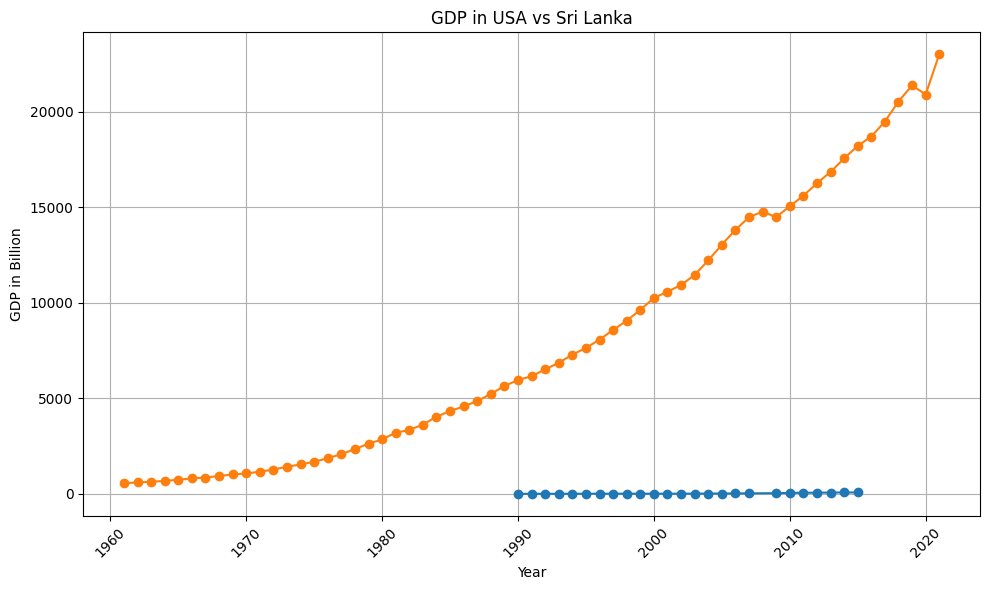

In [57]:
df1.sort_values(by='Year', inplace=True)
df2.sort_values(by='Year', inplace=True)
# Plot GDP over time
plt.figure(figsize=(10, 6))
plt.plot(df1['Year'], df1['GDP_in_B'], marker='o', linestyle='-')
plt.plot(df2['Year'], df2['GDP_in_B'], marker='o', linestyle='-')
plt.title('GDP in USA vs Sri Lanka')
plt.xlabel('Year')
plt.ylabel('GDP in Billion')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


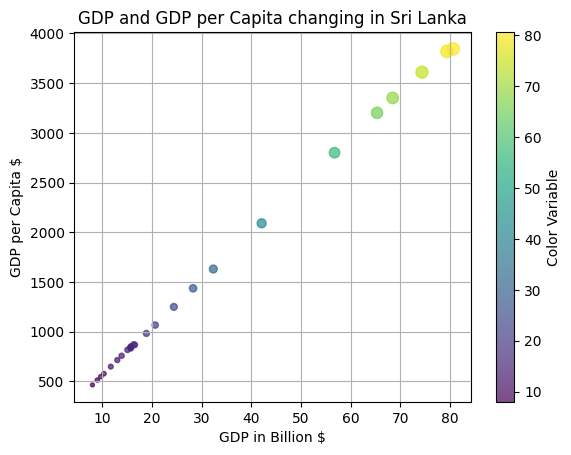

In [60]:
x = df1['GDP_in_B']
y = df1['GDP Per Capita']
sizes = df1['GDP_in_B']  # Optional: Size of markers based on another variable
colors =df1['GDP_in_B'] # Optional: Color of markers based on another variable

# Scatter plot with customizations
plt.scatter(x, y, s=sizes, c=colors, alpha=0.7, cmap='viridis', marker='o')

# Add colorbar (if using color based on another variable)
plt.colorbar(label='Color Variable')

# Add labels and title
plt.xlabel('GDP in Billion $')
plt.ylabel('GDP per Capita $')
plt.title('GDP and GDP per Capita changing in Sri Lanka')

# Add annotations or other customizations as needed

# Show plot
plt.grid(True)
plt.show()



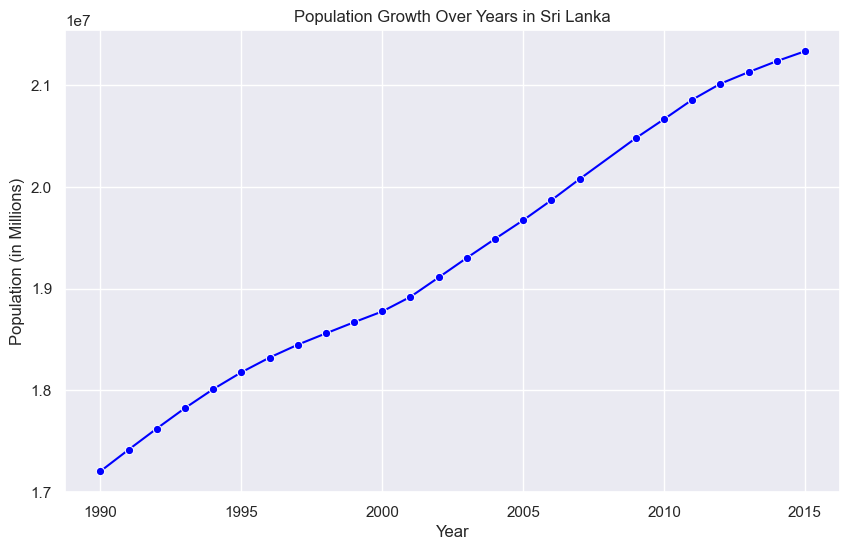

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the default Seaborn style
sns.set_theme()

# Plotting the population data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Year', y='Population_in_M', marker='o', color='blue')
plt.title('Population Growth Over Years in Sri Lanka')
plt.xlabel('Year')
plt.ylabel('Population (in Millions)')
plt.grid(True)
plt.show()


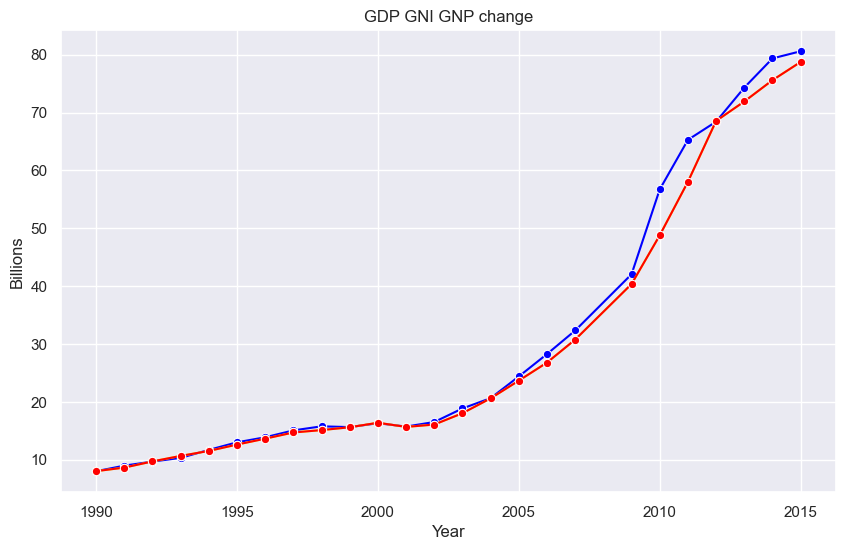

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the default Seaborn style
sns.set_theme()

# Plotting the population data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Year', y='GDP_in_B', marker='o', color='blue')
sns.lineplot(data=df1, x='Year', y='GNI_in_B', marker='o', color='yellow')
sns.lineplot(data=df1, x='Year', y='GNP_in_B', marker='o', color='red')
plt.title('GDP GNI GNP change')
plt.xlabel('Year')
plt.ylabel('Billions')
plt.grid(True)
plt.show()


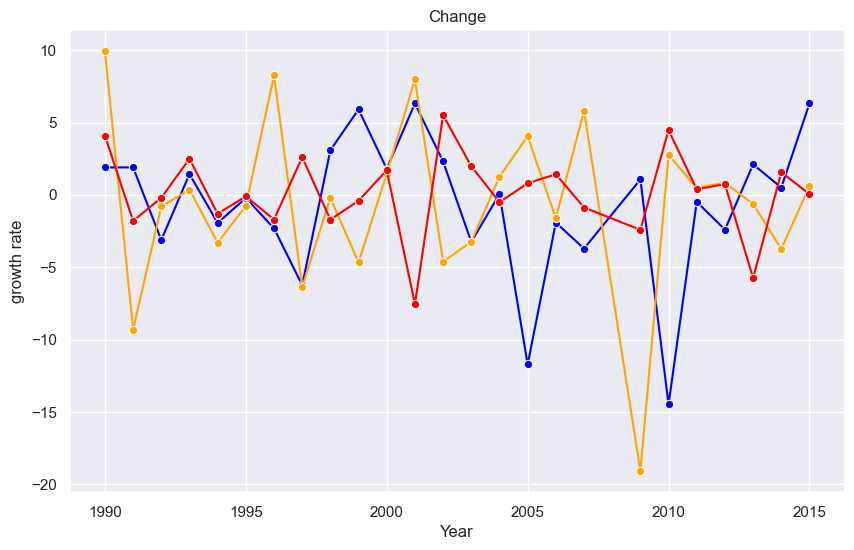

In [83]:

import seaborn as sns

# Use the default Seaborn style
sns.set_theme()

# Plotting the population data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Year', y='Annual Change in Debt to GDP Ratio', marker='o', color='blue')
sns.lineplot(data=df1, x='Year', y='Annual Change in Inflation Rate', marker='o', color='orange')
sns.lineplot(data=df1, x='Year', y='Annual change in GDP growth', marker='o', color='red')
plt.title('Change')
plt.xlabel('Year')
plt.ylabel('growth rate')
plt.grid(True)
plt.show()


In [98]:
import plotly.graph_objs as go

# Create a scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df1['GDP_in_B'],
    y=df1['GNP_in_B'],
    z=df1['GNI_in_B'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',             
        opacity=0.7
    )
)])
# Update layout
fig.update_layout(
                title='3D Scatter Plot',  # Title of the chart
                scene=dict(
                    xaxis_title='GDP in billion',
                    yaxis_title='GNP in billion',
                    zaxis_title='GNI in billion'),
                  width=700,
                  margin=dict(r=20, l=10,
                              b=10, t=10))

fig.show()



In [101]:
import pandas as pd
from scipy.stats import f_oneway



# Extracting columns from DataFrame
group1 = df1['GDP_in_B']
group2 = df1['GNP_in_B']
group3 = df1['GNI_in_B']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)

print("F statistic:", f_statistic)
print("P-value:", p_value)


F statistic: 0.02346924793854368
P-value: 0.9768114823530919
